##Forecasting Holiday Weather Impact



In [ ]:
# Import necessary libraries
import pandas as pd

In [ ]:
# Load the uploaded dataset
file_path = '/content/3882698.csv'  # Change the path if necessary
weather_data = pd.read_csv(file_path)

In [ ]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-01,NaN,NaN,53,"H,,S",61.0,",,S",NaN,NaN
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-02,NaN,NaN,52,"H,,S",59.0,",,S",47.0,",,S"
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-03,NaN,NaN,51,"H,,S",59.0,",,S",NaN,NaN
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-04,NaN,NaN,51,"H,,S",59.0,",,S",45.0,",,S"
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-05,NaN,NaN,54,"H,,S",NaN,NaN,50.0,",,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-12,NaN,NaN,55,"H,,S",73.0,",,S",40.0,",,S"
671,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-13,NaN,NaN,59,"H,,S",72.0,",,S",48.0,",,S"
672,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-14,NaN,NaN,56,"H,,S",73.0,",,S",NaN,NaN
673,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-15,NaN,NaN,54,"H,,S",74.0,",,S",41.0,",,S"


In [ ]:
# Display the first few rows of the dataset to understand its structure
weather_data.head(), weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          675 non-null    object 
 1   NAME             675 non-null    object 
 2   LATITUDE         675 non-null    float64
 3   LONGITUDE        675 non-null    float64
 4   ELEVATION        675 non-null    float64
 5   DATE             675 non-null    object 
 6   PRCP             160 non-null    float64
 7   PRCP_ATTRIBUTES  160 non-null    object 
 8   TAVG             675 non-null    int64  
 9   TAVG_ATTRIBUTES  675 non-null    object 
 10  TMAX             475 non-null    float64
 11  TMAX_ATTRIBUTES  475 non-null    object 
 12  TMIN             565 non-null    float64
 13  TMIN_ATTRIBUTES  565 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 74.0+ KB


(       STATION                 NAME  LATITUDE  LONGITUDE  ELEVATION  \
 0  IN022023000  NEW DELHI PALAM, IN    28.567     77.117      233.0   
 1  IN022023000  NEW DELHI PALAM, IN    28.567     77.117      233.0   
 2  IN022023000  NEW DELHI PALAM, IN    28.567     77.117      233.0   
 3  IN022023000  NEW DELHI PALAM, IN    28.567     77.117      233.0   
 4  IN022023000  NEW DELHI PALAM, IN    28.567     77.117      233.0   
 
          DATE  PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  TMAX  \
 0  2024-01-01   NaN             NaN    53            H,,S  61.0   
 1  2024-01-02   NaN             NaN    52            H,,S  59.0   
 2  2024-01-03   NaN             NaN    51            H,,S  59.0   
 3  2024-01-04   NaN             NaN    51            H,,S  59.0   
 4  2024-01-05   NaN             NaN    54            H,,S   NaN   
 
   TMAX_ATTRIBUTES  TMIN TMIN_ATTRIBUTES  
 0             ,,S   NaN             NaN  
 1             ,,S  47.0             ,,S  
 2             ,,S   NaN   

# Preprocess the dataset


In [ ]:
# Convert the 'DATE' column to datetime format
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

In [ ]:
# Handle missing values: Replace NaNs with suitable fill values (e.g., mean for numerical columns)
weather_data['PRCP'] = weather_data['PRCP'].fillna(0)  # Fill missing precipitation with 0 (no rain)

In [ ]:
weather_data['TMAX'] = weather_data['TMAX'].fillna(weather_data['TMAX'].mean())  # Fill missing TMAX with mean

In [ ]:
weather_data['TMIN'] = weather_data['TMIN'].fillna(weather_data['TMIN'].mean())  # Fill missing TMIN with mean

In [ ]:
# Add a 'HOLIDAY' column (example: New Year's Day on Jan 1)
import numpy as np
weather_data['HOLIDAY'] = np.where(weather_data['DATE'].dt.strftime('%m-%d') == '01-01', 'New Year', 'Non-Holiday')

In [ ]:
# How to analyize data frame?


# .head()
# It is show the first n row in the dataset(N=5 default set)

weather_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,HOLIDAY
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-01,0.0,NaN,53,"H,,S",61.00,",,S",67.890265,NaN,New Year
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-02,0.0,NaN,52,"H,,S",59.00,",,S",47.000000,",,S",Non-Holiday
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-03,0.0,NaN,51,"H,,S",59.00,",,S",67.890265,NaN,Non-Holiday
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-04,0.0,NaN,51,"H,,S",59.00,",,S",45.000000,",,S",Non-Holiday
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-05,0.0,NaN,54,"H,,S",91.88,NaN,50.000000,",,S",Non-Holiday


In [ ]:
# .shape
# It show the total no of rows and no. of coloums of the dataframe


weather_data.shape

(675, 15)

In [ ]:
# .index
# It Show the total no of rows and no of columns of the dataframe


weather_data.index

RangeIndex(start=0, stop=675, step=1)

In [ ]:
# .columns
# It show the name of each column


weather_data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES',
       'TMIN', 'TMIN_ATTRIBUTES', 'HOLIDAY'],
      dtype='object')

In [ ]:
# .dtype
# it show the data-type of each coloums


weather_data.dtypes

,0
STATION,object
NAME,object
LATITUDE,float64
LONGITUDE,float64
ELEVATION,float64
DATE,datetime64[ns]
PRCP,float64
PRCP_ATTRIBUTES,object
TAVG,int64
TAVG_ATTRIBUTES,object


In [ ]:
# .count()
# It shows the total no of non-null values with thier count.it can be applied on single coloums only


weather_data.count()

,0
STATION,675
NAME,675
LATITUDE,675
LONGITUDE,675
ELEVATION,675
DATE,675
PRCP,675
PRCP_ATTRIBUTES,160
TAVG,675
TAVG_ATTRIBUTES,675


In [ ]:
# .value_counts()
# In a coloums, it shows all the unique vlauess with thier count.It can be applied in a single coloum only


weather_data['HOLIDAY'].value_counts()



,count
HOLIDAY,
Non-Holiday,673
New Year,2


In [ ]:
# .unique()
# In a coloums, It shows the unique values. it can be applied on a single coloums only not on the whole data frame.


weather_data['NAME'].unique()

array(['NEW DELHI PALAM, IN', 'NEW DELHI SAFDARJUN, IN'], dtype=object)

In [ ]:
# .info()
# Provides the basic information about the dataframe.


weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          675 non-null    object        
 1   NAME             675 non-null    object        
 2   LATITUDE         675 non-null    float64       
 3   LONGITUDE        675 non-null    float64       
 4   ELEVATION        675 non-null    float64       
 5   DATE             675 non-null    datetime64[ns]
 6   PRCP             675 non-null    float64       
 7   PRCP_ATTRIBUTES  160 non-null    object        
 8   TAVG             675 non-null    int64         
 9   TAVG_ATTRIBUTES  675 non-null    object        
 10  TMAX             675 non-null    float64       
 11  TMAX_ATTRIBUTES  475 non-null    object        
 12  TMIN             675 non-null    float64       
 13  TMIN_ATTRIBUTES  565 non-null    object        
 14  HOLIDAY          675 non-null    object   

In [ ]:
# Q 1). Find all the unique 'wind speed' value in data frame

# weather_data.nunique()


weather_data.nunique()

,0
STATION,2
NAME,2
LATITUDE,2
LONGITUDE,2
ELEVATION,2
DATE,340
PRCP,39
PRCP_ATTRIBUTES,1
TAVG,57
TAVG_ATTRIBUTES,1


In [ ]:
# Q 2). Find the number of times when the "HOLIDAY was Non-Holiday	".

# weather_data[weather_data['HOLIDAY']== "Non-Holiday"]


weather_data[weather_data['HOLIDAY']== "Non-Holiday"]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,HOLIDAY
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-02,0.0,NaN,52,"H,,S",59.00,",,S",47.000000,",,S",Non-Holiday
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-03,0.0,NaN,51,"H,,S",59.00,",,S",67.890265,NaN,Non-Holiday
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-04,0.0,NaN,51,"H,,S",59.00,",,S",45.000000,",,S",Non-Holiday
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-05,0.0,NaN,54,"H,,S",91.88,NaN,50.000000,",,S",Non-Holiday
5,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-06,0.0,NaN,53,"H,,S",91.88,NaN,67.890265,NaN,Non-Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-12,0.0,NaN,55,"H,,S",73.00,",,S",40.000000,",,S",Non-Holiday
671,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-13,0.0,NaN,59,"H,,S",72.00,",,S",48.000000,",,S",Non-Holiday
672,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-14,0.0,NaN,56,"H,,S",73.00,",,S",67.890265,NaN,Non-Holiday
673,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-15,0.0,NaN,54,"H,,S",74.00,",,S",41.000000,",,S",Non-Holiday


In [ ]:
# Q.3) What is the mean "Visibility"?

# weather_data.ELEVATION.mean()


weather_data.ELEVATION.mean()


224.56296296296296

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          675 non-null    object        
 1   NAME             675 non-null    object        
 2   LATITUDE         675 non-null    float64       
 3   LONGITUDE        675 non-null    float64       
 4   ELEVATION        675 non-null    float64       
 5   DATE             675 non-null    datetime64[ns]
 6   PRCP             675 non-null    float64       
 7   PRCP_ATTRIBUTES  160 non-null    object        
 8   TAVG             675 non-null    int64         
 9   TAVG_ATTRIBUTES  675 non-null    object        
 10  TMAX             675 non-null    float64       
 11  TMAX_ATTRIBUTES  475 non-null    object        
 12  TMIN             675 non-null    float64       
 13  TMIN_ATTRIBUTES  565 non-null    object        
 14  HOLIDAY          675 non-null    object   

In [ ]:
# Q.5) Rename the column name "PRCP" of the dataframe to "Percipitation"

# weather_data.rename( columns = {'PRCP' : 'Percipitation'})


weather_data.rename( columns = {'PRCP' : 'Percipitation'})

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,Percipitation,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,HOLIDAY
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-01,0.0,NaN,53,"H,,S",61.00,",,S",67.890265,NaN,New Year
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-02,0.0,NaN,52,"H,,S",59.00,",,S",47.000000,",,S",Non-Holiday
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-03,0.0,NaN,51,"H,,S",59.00,",,S",67.890265,NaN,Non-Holiday
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-04,0.0,NaN,51,"H,,S",59.00,",,S",45.000000,",,S",Non-Holiday
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-05,0.0,NaN,54,"H,,S",91.88,NaN,50.000000,",,S",Non-Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-12,0.0,NaN,55,"H,,S",73.00,",,S",40.000000,",,S",Non-Holiday
671,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-13,0.0,NaN,59,"H,,S",72.00,",,S",48.000000,",,S",Non-Holiday
672,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-14,0.0,NaN,56,"H,,S",73.00,",,S",67.890265,NaN,Non-Holiday
673,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.200,216.0,2024-12-15,0.0,NaN,54,"H,,S",74.00,",,S",41.000000,",,S",Non-Holiday


<Axes: title={'center': 'Average Temperature Over Time'}, xlabel='Date', ylabel='Temperature (°C)'>

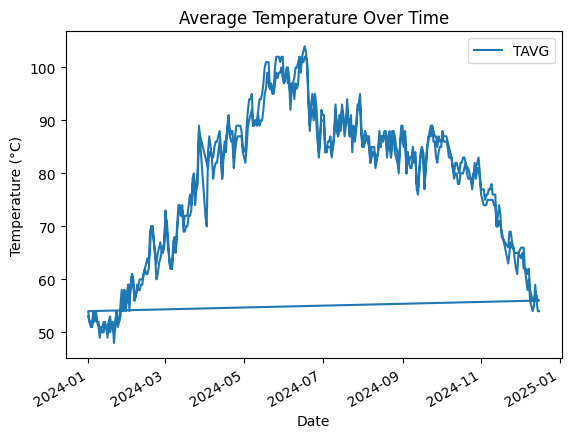

In [ ]:
# Temperature Trends Over Time
weather_data.plot(x='DATE', y='TAVG', title='Average Temperature Over Time', xlabel='Date', ylabel='Temperature (°C)')


In [ ]:
# Verify preprocessing results
weather_data.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,HOLIDAY
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-01,0.0,NaN,53,"H,,S",61.00,",,S",67.890265,NaN,New Year
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-02,0.0,NaN,52,"H,,S",59.00,",,S",47.000000,",,S",Non-Holiday
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-03,0.0,NaN,51,"H,,S",59.00,",,S",67.890265,NaN,Non-Holiday
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-04,0.0,NaN,51,"H,,S",59.00,",,S",45.000000,",,S",Non-Holiday
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2024-01-05,0.0,NaN,54,"H,,S",91.88,NaN,50.000000,",,S",Non-Holiday


Text(0.5, 1.0, 'Temperature Distribution: Holidays vs. Non-Holidays')

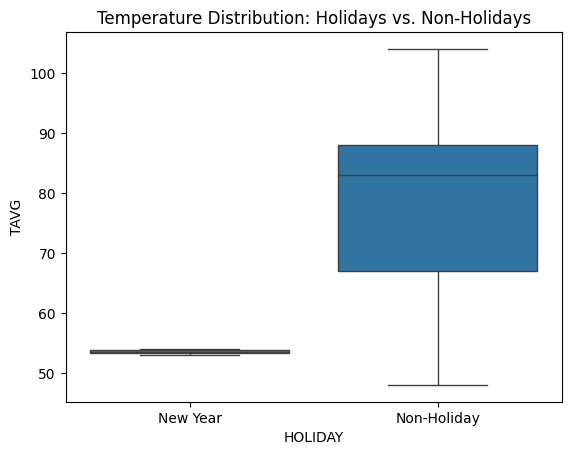

In [ ]:
# Holiday vs. Non-Holiday Temperature
import seaborn as sns
sns.boxplot(data=weather_data, x='HOLIDAY', y='TAVG').set_title('Temperature Distribution: Holidays vs. Non-Holidays')


Text(0.5, 1.0, 'Precipitation: Holidays vs. Non-Holidays')

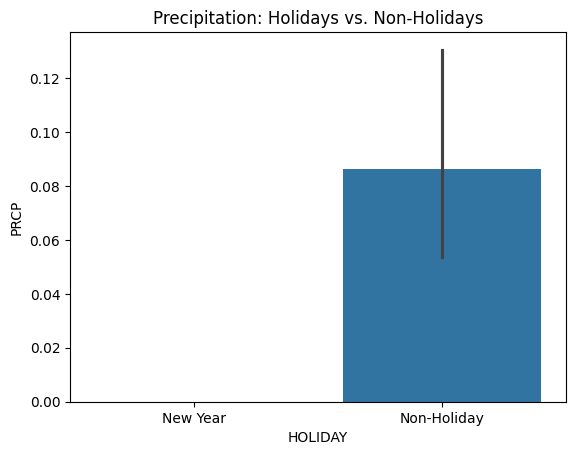

In [ ]:
# Precipitation on Holidays
sns.barplot(data=weather_data, x='HOLIDAY', y='PRCP').set_title('Precipitation: Holidays vs. Non-Holidays')


<Axes: title={'center': 'Temperature vs Precipitation'}, xlabel='TAVG', ylabel='PRCP'>

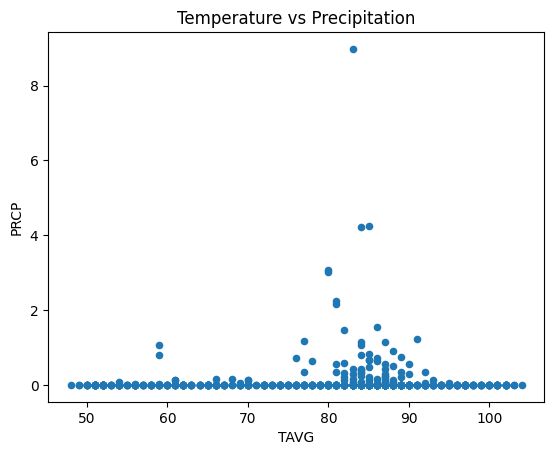

In [ ]:
# Scatter Plot of Temperature vs. Precipitation
weather_data.plot.scatter(x='TAVG', y='PRCP', title='Temperature vs Precipitation')


<Axes: title={'center': '7-Day Rolling Average Temperature'}, xlabel='DATE'>

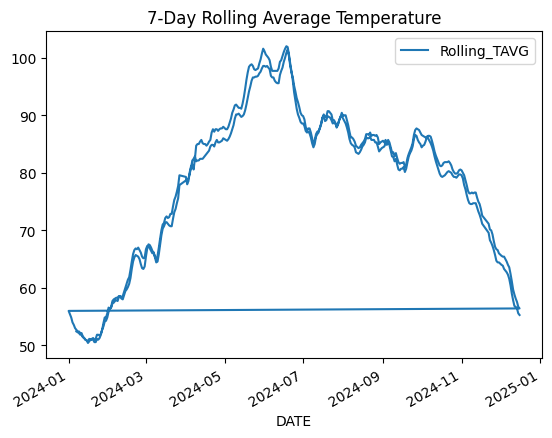

In [ ]:
# Rolling Average of Temperature
weather_data['Rolling_TAVG'] = weather_data['TAVG'].rolling(window=7).mean()
weather_data.plot(x='DATE', y='Rolling_TAVG', title='7-Day Rolling Average Temperature')
